**MovieLens Dataset Recommender System**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie = pd.read_csv("/content/drive/MyDrive/MovieLens/movie.csv")
print(movie.columns)
movie.head(5)

Index(['movieId', 'title', 'genres'], dtype='object')


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Genres are a pipe-separated list, and are selected from the following:

Action/
Adventure/
Animation/
Children's/
Comedy/
Crime/
Documentary/
Drama/
Fantasy/
Film-Noir/
Horror/
Musical/
Mystery/
Romance/
Sci-Fi/
Thriller/
War/
Western/
(no genres listed)

In [ ]:
rating = pd.read_csv("/content/drive/MyDrive/MovieLens/rating.csv")
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
#Selecting all rows and certain columns from the DataFrame
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [ ]:
data1 = pd.merge(movie,rating)
data1.head(5)
# data.shape #(20000263, 5) This is very large!!!!!!!!!!!!!!

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [ ]:
#Pivot table
data = data1.iloc[:1000000,:]#Due to the data is too large
pivot_table = data.pivot_table(index=["userId"], columns=["title"], values="rating")
print(pivot_table.shape) #(123161, 146)
pivot_table.head(10)


(123161, 146)


title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Save the pivot table
pivot_table.to_csv('/content/sample_data.csv', index=False)

In [ ]:
#Find similar movies to certain movies
movie_watched = pivot_table["Vampire in Brooklyn (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Vampire in Brooklyn (1995)                                        1.000000
Headless Body in Topless Bar (1995)                               0.889297
Gospa (1995)                                                      0.866025
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.745499
Race the Sun (1996)                                               0.697001
dtype: float64

In [ ]:
#How many times each movie is rated
rating_counts = pd.DataFrame(data["title"].value_counts())
rating_counts

,title
Braveheart (1995),53769
Toy Story (1995),49695
"Usual Suspects, The (1995)",47006
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),44980
Seven (a.k.a. Se7en) (1995),43249
...,...
Sonic Outlaws (1995),36
Guardian Angel (1994),27
Nueba Yol (1995),19
Headless Body in Topless Bar (1995),16


**What is User-Based Collaborative Filtering**

User-based collaborative filtering is a technique used in recommender systems to provide personalized recommendations to users based on their preferences and the preferences of similar users. It is a form of collaborative filtering that focuses on the similarity between users rather than items.

In user-based collaborative filtering, recommendations are generated by identifying users who have similar preferences to a target user and suggesting items that these similar users have liked or interacted with. The underlying assumption is that if two users have similar tastes and preferences, they are likely to have similar preferences for other items as well.

The process of user-based collaborative filtering typically involves the following steps:

Data collection: Gather data on user-item interactions, such as ratings, reviews, or purchase history.

User similarity calculation: Calculate the similarity between users based on various metrics, such as cosine similarity or Pearson correlation. The similarity is usually determined by comparing the ratings or preferences of users who have interacted with similar items.

Neighborhood selection: Identify a subset of similar users for each user in the system. This subset, known as the user's neighborhood, consists of users who have similar preferences and tastes.

Recommendation generation: Once the user's neighborhood is established, the system can generate recommendations by considering the items liked or interacted with by users in the neighborhood. The system identifies items that the target user has not interacted with and recommends those items based on the assumption that the user will likely be interested in them.

User-based collaborative filtering has several advantages. It can capture user preferences and provide recommendations even for new users with limited data. It can also handle the "cold start" problem, where there is limited information about new users or items. Additionally, it can provide serendipitous recommendations by suggesting items that users may not have discovered on their own.

However, user-based collaborative filtering can have challenges with scalability when dealing with large user populations and sparse user-item interaction matrices. It may also face issues when users have diverse or evolving preferences, as the recommendations may not accurately reflect their current interests.

Overall, user-based collaborative filtering is a popular and effective approach in building recommender systems, particularly in scenarios where user similarities can be accurately measured and utilized for generating recommendations.

In [ ]:
import random
import logging
from sklearn.model_selection import train_test_split
import sklearn.model_selection

In [ ]:
"""
rating1 = pd.read_csv("/content/drive/MyDrive/MovieLens/rating.csv")
print(rating1.columns)
df = pd.DataFrame(rating1)
rating = df.drop('timestamp', axis=1)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [ ]:
"""
train_dataset, test_dataset = sklearn.model_selection.train_test_split(rating,
                                                               random_state = 10,
                                                              test_size=0.2,
                                                              shuffle=True)
print(train_dataset.shape)#(16000210, 3)

print(test_dataset.shape)# (4000053, 3)

In [ ]:
#An simple example
"""
# Initialize an empty train_dataset as a dictionary
train_dataset = {}

# User 1 watches and likes movies
train_dataset[1] = set()
train_dataset[1].add(101)  # User 1 watches and likes movie 101
train_dataset[1].add(105)  # User 1 watches and likes movie 105

# User 2 watches and likes movies
train_dataset[2] = set()
train_dataset[2].add(101)  # User 2 watches and likes movie 101
train_dataset[2].add(103)  # User 2 watches and likes movie 103

print(train_dataset[1])
#{105, 101}

print(train_dataset[2])
#{101, 103}
"""

{105, 101}
{101, 103}


In [ ]:

class MovieLensDataSet(object):
    # the MovieLen Dataset
    def __init__(self, data_path):
        ratings_path = "rating.csv"
        self.train_dataset = {}#initializes an empty dictionary to store training data
        self.test_dataset = {}
        self.movies = {} #to store information about movies from the MovieLens dataset.
        with open(f"{data_path}/{ratings_path}", "r") as f:#opens a file located at the combination of data_path and ratings_path)
            for line in f.readlines()[1:]:#starting from the second line (skipping the header row).
                                          #It reads the lines one by one.
                userid, movieid, rating, _ = line.split(',')
                #assigns values of each row to variables: userid, movieid, rating, and _ (a placeholder for an unused value).
                if movieid not in self.movies:
                #If movieid not present, adds the movieid as a key to the dictionary with the value True.
                    self.movies[movieid] = True
                if random.random() <= 0.2:
                    # test data set
                    if userid not in self.test_dataset:
                    #considers the data point as part of the test dataset
                        self.test_dataset[userid] = set()
                    #adds the movieid to the corresponding user's set
                    self.test_dataset[userid].add(movieid)
                else :
                    # train data set
                    if userid not in self.train_dataset:
                        self.train_dataset[userid] = set()
                    self.train_dataset[userid].add(movieid)
            #It provides information on how many users are in each dataset.
            logging.info(f"train_dataset {len(self.train_dataset)}, tesst_datset {len(self.test_dataset)}")

    def get_movies_cnt(self):
        return len(self.movies)

In [ ]:
class UserBasedCF(object):
    # User-Based Collaborative Filtering
    def __init__(self, dataset):
        """
        """
        self.dataset = dataset


    def recommend(self, userid, n = 5, k = 7):#generate recommendation based on user similarity
        """
        recommend to user the movies top n=5(number of movies to recommendate)
        the list of recommendations for userid k=7
        """
        similar_userids = self.find_similar_userids(userid)#find users similar to the userid
        if len(similar_userids) == 0:#store similar userid in the variable 'similar_userids'
            return []#if no similar userid can be found, return to an exmpty set.
        #print ("simalar userid", similar_userids)
        similar_userids_movies = self.find_simiar_userid_movies(userid, similar_userids)#find similar movies
        #print ("similar user movies", similar_userids_movies)
        return similar_userids_movies


    def find_similar_userids(self, userid, n = 5):
        """
        find the silimar user top n
        """
        if userid not in self.dataset.train_dataset:
            return []

        similar_list = [] #create a list to store tuples containing user IDs and the count of shared movies
        #userid_ is used as loop variable to iterate through the keys (user IDs), it is a throwaway variable
        for userid_, movies in self.dataset.train_dataset.items():
            if userid_ == userid:
                continue#skip the current userid, move to the next.
            # Otherwise, if the userid_ not euqal to userid, calculate the number of common movies
            #Save the tuples to the similar_list=[]
            similar_list.append((userid_, len(self.dataset.train_dataset[userid].intersection(self.dataset.train_dataset[userid_]))))
        similar_sorted_list = sorted(similar_list, key=lambda x: x[1], reverse=True)
        #sort the simialr_list based on the count of shared movies(x[1] 2nd column) in descending order(reverse = True下降)
        #print (similar_sorted_list)
        return [x[0] for x in similar_sorted_list[:n]]#return to the top 5 userid

    def find_simiar_userid_movies(self, userid, similar_userids, k = 7):
        """
        find the movies from the similar usrids
        """################?????????????????????########
        movies = {}#create a dictionary to store movie IDs as keys and the associated counts as values.
        for userid_ in similar_userids:# a list of 5 similar userids
            for movie in self.dataset.train_dataset[userid_]:
                if movie in self.dataset.train_dataset[userid]:
                    continue# skip if it has the movie
                if movie not in movies:
                    movies[movie] = 0 #updates the movies dictionary by incrementing the count
                movies[movie] += 1 # movies use movie IDs as a key and the count of movies as values
        movies_sorted = sorted(movies.items(), key=lambda x: x[1], reverse=True)
        #print (movies_sorted)
        return [x[0] for x in movies_sorted[:k]]

    def test_model(self):
        """
        return :
        https://www.cnblogs.com/fuxuemingzhu/p/15436050.html
        Precision
        Recall
        Coverage
        Popularity
        """
        recall_movies_cnt = 0 #track the number of recommended movies.
        true_movies_cnt = 0 #track of the number of movies in the test dataset
        hit_movies_cnt = 0 #track of the number of recommended movies that match the true_movies_cnt.
        print_log_cnt = 100 #every 100 users processed, print the progress.
        process_cnt = 1 #track of the number of users processed.
        recommend_movies_total = {} # track all unique recommended movies across all users.

        #For each user (userid), it retrieves the list of movies that the user actually rated.
        for userid, movies in self.dataset.test_dataset.items():
            recommend_movies = self.recommend(userid)
            if len(recommend_movies) == 0:
                continue #if no recommed_movies, skip to next userid
            for recommend_movie in recommend_movies:
                if recommend_movie not in recommend_movies_total:
                    recommend_movies_total[recommend_movie] = True #To calculate coverage and popularity metrics later.

         #Updates the counters
            recall_movies_cnt += len(recommend_movies)
            true_movies_cnt += len(movies)#count the movies in test dataset
            userid_hit_movies = set(recommend_movies).intersection(movies)
            hit_movies_cnt += len(userid_hit_movies)
            if process_cnt % print_log_cnt == 0:#for each 100 userid, calculate precision
                print (f"process user {process_cnt}, and result:\n precision: {hit_movies_cnt / recall_movies_cnt:.4f}, recall: {hit_movies_cnt / true_movies_cnt:.4f}, converage : {len(recommend_movies_total) / self.dataset.get_movies_cnt():.4f}\n")
            process_cnt += 1

        print (f"process done result:\n precision: {hit_movies_cnt / recall_movies_cnt:.4f}, recall: {hit_movies_cnt / true_movies_cnt:.4f}, converage : {len(recommend_movies_total) / self.dataset.get_movies_cnt():.4f}\n")

In [ ]:
DATA_DIR = "/content/drive/MyDrive/MovieLens"
ml_dataset = MovieLensDataSet(DATA_DIR)
userbased_cf = UserBasedCF(ml_dataset)
userbased_cf.test_model()

process user 100, and result:
 precision: 0.0300, recall: 0.0096, converage : 0.0115

process user 200, and result:
 precision: 0.0386, recall: 0.0109, converage : 0.0152

process user 300, and result:
 precision: 0.0448, recall: 0.0119, converage : 0.0182

process user 400, and result:
 precision: 0.0421, recall: 0.0107, converage : 0.0201

process user 500, and result:
 precision: 0.0434, recall: 0.0106, converage : 0.0216

process user 600, and result:
 precision: 0.0424, recall: 0.0105, converage : 0.0229

process user 700, and result:
 precision: 0.0429, recall: 0.0105, converage : 0.0239

process user 800, and result:
 precision: 0.0430, recall: 0.0101, converage : 0.0250

process user 900, and result:
 precision: 0.0422, recall: 0.0101, converage : 0.0261

process user 1000, and result:
 precision: 0.0434, recall: 0.0100, converage : 0.0268

process user 1100, and result:
 precision: 0.0444, recall: 0.0105, converage : 0.0281

process user 1200, and result:
 precision: 0.0443, r

Precision = True Positives / (True Positives + False Positives)

A precision of 0.0478 indicates that only 4.78% of the positive predictions made by the model were correct. This suggests that there are a significant number of false positives, and the model is not doing a good job of accurately identifying the target class.

Recall = True Positives / (True Positives + False Negatives)

A recall of 0.0113 indicates that only 1.13% of the actual positive instances were correctly identified by the model. This suggests that the model is missing a large number of positive instances, leading to a low recall.

Coverage: Coverage measures the proportion of the dataset that your model has made predictions on.

Coverage = Predicted Instances / Total Instances

A coverage of 0.0394 means that the model made predictions for only 3.94% of the total instances in the dataset

**PPO 1:** One movie is recommended...

In [ ]:
import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/data.csv")
print(data.shape)#(943, 22)
data.columns

(943, 22)


Index(['Unnamed: 0', 'userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [ ]:
movie = data.iloc[:, 1:]
print(movie.shape)#(943, 21)
movie.head(5)

(943, 21)


,userId,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,168,172,165,156,166,196,187,250,127,...,181,109,117,1,246,257,50,248,253,249
1,2,286,258,305,307,288,312,301,292,269,...,299,303,315,19,1,296,297,275,293,257
2,3,302,333,344,300,268,303,337,354,345,...,288,319,352,341,272,350,343,334,353,339
3,4,258,300,288,328,271,303,362,359,327,...,360,324,301,361,354,210,356,357,50,260
4,5,267,222,455,121,405,363,257,250,25,...,100,109,369,235,412,411,407,105,368,225


In [ ]:
action_space= movie.iloc[:, -1].unique().tolist()
print(len(action_space))

431


In [ ]:
# Hyperparameters
learning_rate =0.05     #?????????????????? 0.0005
gamma = 0.98
lmbda = 0.95
#trade-off parameter between bias and variance in (GAE) (0.9-0.99).
# A smaller lambda can reduce variance but increase bias.

eps_clip = 0.2 # or use 0.1    #???????????????

#The number of iterations (epochs) for updating the neural network
K_epoch = 10  #10000

#policy will be updated based on the data collected over the T_horizon time steps
T_horizon = 20

epsilon = 0.2

In [ ]:
#create the environment
class CustomEnvironment:
    def __init__(self, dataset, model):
        self.dataset = dataset
        self.step = 0
        self.num_states = len(self.dataset) #943
        self.state_size = 19 #19 features
        self.action_space = action_space
        self.model = model  # add ppo model as an argument

    def reset(self):
        self.step = 0
        return self.get_state()

    def get_state(self):  # retrieve the current state
        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()  # change the value of Y from array to integer

        #s = current_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        # kaichuang zhang modification
        s = current_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        return s



    def sample_action(self, s, epsilon):#To obtain the log probability of acutal action a
        state = torch.from_numpy(s).float().unsqueeze(0)
        probs = self.model.pi(state)

        coin = random.random()
        if coin < epsilon:
           #a = random.choice(action_space)
           a = random.randint(0, 430)
           # kaichuang zhang modification
           prob_a = 1/431 * torch.ones_like(probs[0, 1]) # Create a tensor value of 1/431
           #log_prob = torch.log(prob)
           #log_prob = torch.tensor([0.000001]) # To avoid empty tensors, specifically tensor([0.])##
        else :
           a = torch.argmax(probs).item()
           # Use item() to get the scalar value from the tensor. Random case: a = torch.multinomial(probs, 1).item()
           prob_a = probs[0, a] # or use prob = probs[0][a] to get the probability of the selected action
           #prob_a = probs
           #log_prob = torch.log(prob) # Obtain the log probability of the sampled action

        #prevent the 'prob_a' from 0
        e = 1e-8
        prob_a = torch.clamp(prob_a, e, 1.0 - e)
        return a, prob_a


    def get_next_state(self):
        if self.step < self.num_states - 1:
           next_row = self.dataset.iloc[self.step + 1]
           #s_prime = next_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
           s_prime = next_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
        else: # If self.step is already at the last row, reset

           s_prime = np.zeros(19) # use all zeros as the last row

        return s_prime


    def get_reward(self, epsilon):

        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()#change the value of Y from array to integer

        if self.step < self.num_states - 1:
           done = False
           action, _ = self.sample_action(self.get_state(), epsilon)  # Pass state and epsilon

        #Calculate the reward
           if action == current_label:
              r = 1  # Correct classification
           else:
              r = 0  # Incorrect classification


        else:
          # If self.step is already at the last row, reset
            self.reset()
            done = True
            r = 0

        return r, done

In [ ]:
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.data = []#A list to store transition data
        self.losses = []  # To store losses for each episode

        self.fc1 = nn.Linear(19, 256)
        self.fc_pi = nn.Linear(256, 431)
        self.fc_v = nn.Linear(256, 1)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def pi(self, x, softmax_dim=0):
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob

    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v

    def put_data(self, transition):
        self.data.append(transition)

    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, prob_a_lst, done_lst = [], [], [], [], [], []
        for transition in self.data:
            s, a, r, s_prime, prob_a, done = transition

            s_lst.append(s.tolist())
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime.tolist())
            prob_a_lst.append([prob_a.tolist()])
            done_mask = 0 if done else 1
            done_lst.append([done_mask])
        #print (f's_lst : {s_lst}')
        #print (f'a_lst : {a_lst}')
        #print (f'r_lst : {r_lst}')
        #print (f's_prime_lst: {s_prime_lst}')
        #print (f'done_lst :{done_lst}')
        #print (f'prob_a_lst: {prob_a_lst}')
        s, a, r, s_prime, done_mask, prob_a = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
            torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
            torch.tensor(done_lst, dtype=torch.float), torch.tensor(prob_a_lst)
        self.data = []
        return s, a, r, s_prime, done_mask, prob_a

    def train_net(self):
        s, a, r, s_prime, done_mask, prob_a = self.make_batch()

        for i in range(K_epoch):#32 in this case
            td_target = r + gamma * self.v(s_prime) * done_mask
            delta = td_target - self.v(s)
            delta = delta.detach().numpy()

            advantage_lst = []
            advantage = 0.0
            for delta_t in delta[::-1]: #Iterate over the inverse order from the most recent time
                advantage = gamma * lmbda * advantage + delta_t[0]#Compute the GAE
                advantage_lst.append([advantage])
            advantage_lst.reverse()
            advantage = torch.tensor(advantage_lst, dtype=torch.float)

            pi = self.pi(s, softmax_dim=1)
            pi_a = pi.gather(1, a)#The probability of acutal action
################ add a small e-value to avoid zero probability######
            e = 1e-8
            pi_a = torch.clamp(pi_a, e, 1.0 - e)
            prob_a = torch.clamp(prob_a, e, 1.0 - e)
################
            ratio = torch.exp(torch.log(pi_a) - torch.log(prob_a))  # a/b == exp(log(a)-log(b))
            ratio = torch.clamp(ratio, e, 1.0 + e)###### prevent that "ratio = 0"
            #?If "torch.log(pi_a) - torch.log(prob_a)" is a large negative number, then the ratio might be close to 0(NAN)

            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1 - eps_clip, 1 + eps_clip) * advantage
            loss = -torch.min(surr1, surr2) + F.smooth_l1_loss(self.v(s), td_target.detach())
            #print(f'actor loss: {-torch.min(surr1, surr2)}')
            #print(f'critic loss: {F.smooth_l1_loss(self.v(s), td_target.detach())}')
            #print(f'loss: {loss}')



            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

            self.losses.append(loss.mean().item())  # Store the mean loss

            return loss.mean().item()  # It is 20 losses tensor

# of episode :0, score : 0.0, avg loss: 130.5350
# of episode :1, score : 0.0, avg loss: 65.3181
# of episode :2, score : 0.0, avg loss: 43.5541
# of episode :3, score : 0.0, avg loss: 32.6686
# of episode :4, score : 0.0, avg loss: 26.1365
# of episode :5, score : 0.0, avg loss: 21.7813
# of episode :6, score : 0.0, avg loss: 18.6703
# of episode :7, score : 0.0, avg loss: 16.3366
# of episode :8, score : 0.0, avg loss: 14.5217
# of episode :9, score : 0.0, avg loss: 13.0699
# of episode :10, score : 1.0, avg loss: 11.8821
# of episode :11, score : 0.0, avg loss: 10.8920
# of episode :12, score : 1.0, avg loss: 10.0545
# of episode :13, score : 0.0, avg loss: 9.3364
# of episode :14, score : 1.0, avg loss: 8.7140
# of episode :15, score : 0.0, avg loss: 8.1695
# of episode :16, score : 0.0, avg loss: 7.6889
# of episode :17, score : 1.0, avg loss: 7.2618
# of episode :18, score : 0.0, avg loss: 6.8799
# of episode :19, score : 1.0, avg loss: 6.5363
# of episode :20, score : 0.0, avg l

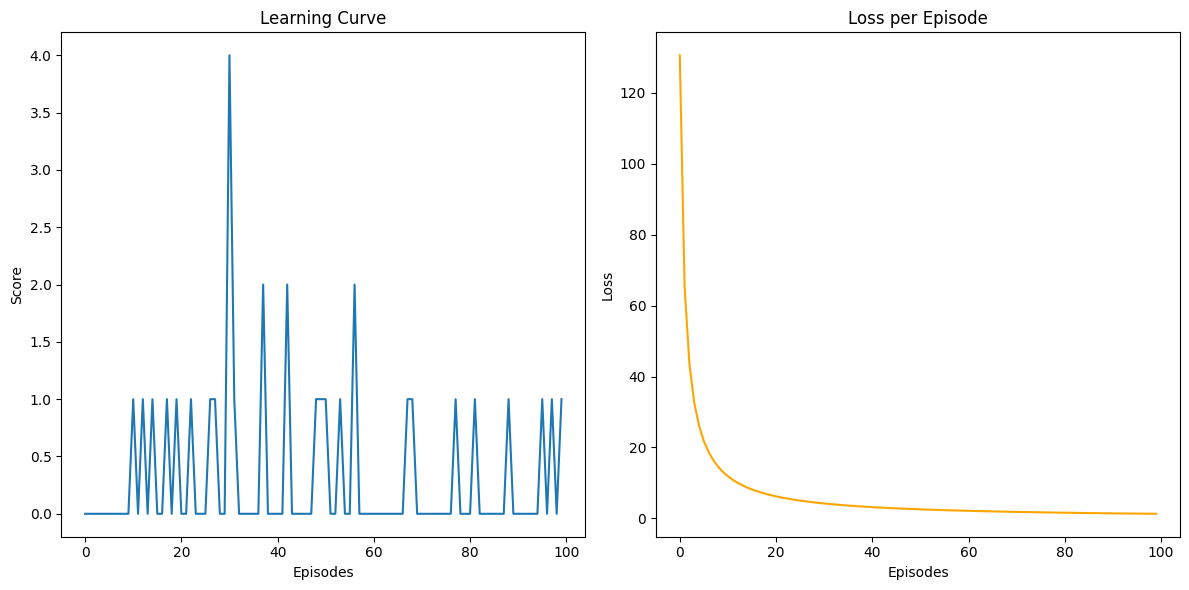

In [ ]:
def main():
    model = PPO()
    env = CustomEnvironment(movie, model)  # add model

    scores = []  # To store scores for each episode
    episodes = []
    averageloss= []
    #score = 0.0
    #print_interval = 10


    for n_epi in range(100):
        s= env.reset()
        done = False
        score = 0.0
        losses = []  # To store losses for each episode


        while not done:
            for t in range(T_horizon):#20

                s = env.get_state()
                s_prime = env.get_next_state()
                r, done = env.get_reward(epsilon)
                a, prob_a = env.sample_action(s, epsilon)
                #print(s, a, r, s_prime, prob_a)
                #print(f'step: {env.step}')

                #prob = model.pi(torch.from_numpy(s).float())
                #m = Categorical(prob)
                #a = m.sample().item()


                model.put_data((s, a, r , s_prime, prob_a, done))
                s = s_prime
                env.step += 1

                score += r
                if done:
                    break

            episode_loss = model.train_net()

        scores.append(score)
        episodes.append(n_epi)

        avg_loss=sum(model.losses) / len(model.losses)
        averageloss.append(avg_loss)

        #if n_epi % print_interval == 0 and n_epi != 0:
            #avg_score = score / print_interval
            #print("# of episode :{}, avg score : {:.1f}".format(n_epi, avg_score))
        print("# of episode :{}, score : {:.1f}, avg loss: {:.4f}".format(n_epi, score, sum(model.losses) / len(model.losses)))
        #score = 0.0

    #env.close()

 # Plot the learning curve and loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(episodes, scores)
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.title('Learning Curve')

    plt.subplot(1, 2, 2)
    plt.plot(episodes, averageloss, color='orange')
    plt.xlabel('Episodes')
    plt.ylabel('Loss')
    plt.title('Loss per Episode')

    plt.tight_layout()
    plt.show()

    # Save the model
    torch.save(model, 'model_PPO.pth')

if __name__ == "__main__":
    main()

In [ ]:
############################### Attention: 5 Movies###################################

In [ ]:
#create the environment
class CustomEnvironment:
    def __init__(self, dataset, model):
        self.dataset = dataset
        self.step = 0
        self.num_states = len(self.dataset) #943
        self.state_size = 19 #19 features
        self.action_space = action_space
        self.model = model  # add ppo model as an argument

    def reset(self):
        self.step = 0
        return self.get_state()

    def get_state(self):  # retrieve the current state
        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()  # change the value of Y from array to integer

        #s = current_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        # kaichuang zhang modification
        s = current_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        return s



    def sample_action(self, s, epsilon):
        state = torch.from_numpy(s).float().unsqueeze(0)
        probs = self.model.pi(state)#probs is a tensor

        coin = random.random()
        if coin < epsilon:
           # Recommend 5 random movies
           recommended_movies = random.sample(range(431), k=5)
           #prob_a = 1/431 * torch.ones(5)  # Equal probability for each recommended movie
           prob_a = [1/431] * 5
           #prob_a = [1/431, 1/431, 1/431, 1/431, 1/431]
           a = torch.tensor(recommended_movies) #change a to tensor??
        else:
           # Recommend 5 movies with the highest probabilities
           #"sorted_probs"： sort in descending order
           #sorted_probs, indices = torch.topk(probs, 5) # returns top 5 probs and the corresponding 5 actions
           #a = indices[0].tolist()# 5 actions from tensor to list
           #prob_a = sorted_probs[0] # 5 probabilities in tensor
           _, indices = torch.topk(probs, 5)
           a = indices.squeeze(0)# add this line
           #a = indices[0]#   if add .tolist(), then action is a list
           prob_a = probs[0, a].tolist()#change probability to list

        # Prevent 'prob_a' from being 0
        e = 1e-8
        prob_a = [max(p, e) for p in prob_a]
        #prob_a = torch.clamp(prob_a, e, 1.0 - e)
        return a, prob_a



    def get_next_state(self):
        if self.step < self.num_states - 1:
           next_row = self.dataset.iloc[self.step + 1]
           #s_prime = next_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
           s_prime = next_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
        else: # If self.step is already at the last row, reset

           s_prime = np.zeros(19) # use all zeros as the last row

        return s_prime



    def get_reward(self, epsilon):
        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()

        if self.step < self.num_states - 1:
           done = False
           actions, _ = self.sample_action(self.get_state(), epsilon)
           # Calculate the reward
           if current_label in actions:
              r = 1  # Correct classification
           else:
              r = 0  # Incorrect classification
        else:
           # If self.step is already at the last row, reset
           self.reset()
           done = True
           r = 0

        return r, done

In [ ]:
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.data = []#A list to store transition data
        self.losses = []  # To store losses for each episode

        self.fc1 = nn.Linear(19, 256)
        self.fc_pi = nn.Linear(256, 431)
        self.fc_v = nn.Linear(256, 1)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def pi(self, x, softmax_dim=0):
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob

    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v

    def put_data(self, transition):
        self.data.append(transition)

    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, prob_a_lst, done_lst = [], [], [], [], [], []
        for transition in self.data:
            s, a, r, s_prime, prob_a, done = transition

            s_lst.append(s.tolist())
            a_lst.append(a.tolist())# when a is a list, use [a]
            r_lst.append([r])
            s_prime_lst.append(s_prime.tolist())
            prob_a_lst.append(prob_a)# change [prob_a.tolist()] since prob_a is a list already
            done_mask = 0 if done else 1
            done_lst.append([done_mask])
        #print (f's_lst : {s_lst}')
        #print (f'a_lst : {a_lst}')
        #print (f'r_lst : {r_lst}')
        #print (f's_prime_lst: {s_prime_lst}')
        #print (f'done_lst :{done_lst}')
        #print (f'prob_a_lst: {prob_a_lst}')
        s, a, r, s_prime, done_mask, prob_a = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
            torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
            torch.tensor(done_lst, dtype=torch.float), torch.tensor(prob_a_lst)
        self.data = []
        return s, a, r, s_prime, done_mask, prob_a

    def train_net(self):
        s, a, r, s_prime, done_mask, prob_a = self.make_batch()

        for i in range(K_epoch):#32 in this case
            td_target = r + gamma * self.v(s_prime) * done_mask
            delta = td_target - self.v(s)
            delta = delta.detach().numpy()

            advantage_lst = []
            advantage = 0.0
            for delta_t in delta[::-1]: #Iterate over the inverse order from the most recent time
                advantage = gamma * lmbda * advantage + delta_t[0]#Compute the GAE
                advantage_lst.append([advantage])
            advantage_lst.reverse()
            advantage = torch.tensor(advantage_lst, dtype=torch.float)


            pi = self.pi(s, softmax_dim=1)#pi shape: torch.Size([1, 431])
            a = a.squeeze(0)#################
            #print("pi shape:", pi.shape)#(20, 431) after batch
            #print("a shape:", a.shape)#(20, 5)

            #print("Size of a:", a.size())
            #print("Contents of a:", a)


            # Use unsqueeze to match dimensions
            #pi_a = pi.gather(1, a.unsqueeze(1))# the size of a is [5,1]
            pi_a = pi.gather(1, a)#The probability of acutal action
            #print("prob of actual action:", pi_a)
            #for i in range(20):
                #print(f"i: {i}, a[i]: {a[i]}, pi[i, a[i]]: {pi[i, a[i]]}")

           # Trim the first 3 actions if the length is greater than 20   #################
            if len(a[0]) > 20:
               a = [a_i[3:] for a_i in a]

            # Ensure 'prob_a' is a tensor with shape (batch_size, 5)
            prob_a = torch.stack([pi[i, a[i]] for i in range(len(a))])

            # Ensure 'prob_a' is a tensor with shape (batch_size, 5)
            #prob_a = torch.stack([pi[i, a[i]] for i in range(20)])# If pi has a shape of (batch_size, 431)
            #prob_a = torch.stack([pi[0, a[i]] for i in range(5)])# If pi has a shape of (431, batch_size)
            #print("prob_a shape:", prob_a.shape)#(20, 5)
            #print("prob of a:", prob_a)



################ add a small e-value to avoid zero probability######
            e = 1e-8
            pi_a = torch.clamp(pi_a, e, 1.0 - e)
            prob_a = torch.clamp(prob_a, e, 1.0 - e)
################
            ratio = torch.exp(torch.log(pi_a) - torch.log(prob_a))  # a/b == exp(log(a)-log(b))
            ratio = torch.clamp(ratio, e, 1.0 + e)###### prevent that "ratio = 0"
            #?If "torch.log(pi_a) - torch.log(prob_a)" is a large negative number, then the ratio might be close to 0(NAN)

            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1 - eps_clip, 1 + eps_clip) * advantage
            loss = -torch.min(surr1, surr2) + F.smooth_l1_loss(self.v(s), td_target.detach())
            #print(f'actor loss: {-torch.min(surr1, surr2)}')
            #print(f'critic loss: {F.smooth_l1_loss(self.v(s), td_target.detach())}')
            #print(f'loss: {loss}')# (batch_size, 5)

            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

            self.losses.append(loss.mean().item())  # Store the mean loss

        return loss.mean().item()  # It is 20 losses tensor

# of episode :0, score : 12.0, avg loss: 260.1098
# of episode :1, score : 13.0, avg loss: 0.0117
# of episode :2, score : 14.0, avg loss: -0.0011
# of episode :3, score : 14.0, avg loss: -0.0034
# of episode :4, score : 10.0, avg loss: -0.0006
# of episode :5, score : 13.0, avg loss: -0.0024
# of episode :6, score : 15.0, avg loss: 0.0022
# of episode :7, score : 13.0, avg loss: -0.0046
# of episode :8, score : 10.0, avg loss: 0.0099
# of episode :9, score : 9.0, avg loss: 0.0042
# of episode :10, score : 12.0, avg loss: 0.0001
# of episode :11, score : 13.0, avg loss: 0.0037
# of episode :12, score : 14.0, avg loss: 0.0098
# of episode :13, score : 13.0, avg loss: 0.0033
# of episode :14, score : 11.0, avg loss: 0.0095
# of episode :15, score : 15.0, avg loss: 0.0137
# of episode :16, score : 13.0, avg loss: 0.0022
# of episode :17, score : 11.0, avg loss: 0.0114
# of episode :18, score : 12.0, avg loss: 0.0149
# of episode :19, score : 13.0, avg loss: 0.0047
# of episode :20, score 

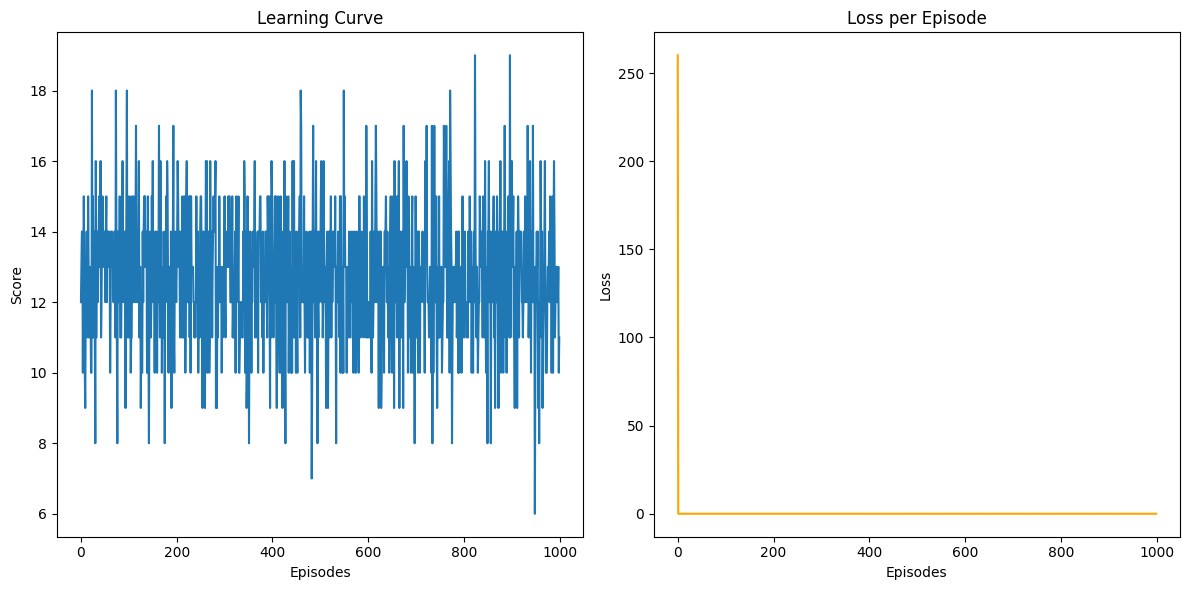

In [ ]:
def main():
    model = PPO()
    env = CustomEnvironment(movie, model)  # add model

    scores = []  # To store scores for each episode
    episodes = []
    averageloss= []
    #score = 0.0
    #print_interval = 10


    for n_epi in range(1000):
        model.losses = []  # Clear losses for each episode
        s= env.reset()
        done = False
        score = 0.0
        losses = []  # To store losses for each episode


        while not done:
            for t in range(T_horizon):#20

                s = env.get_state()
                s_prime = env.get_next_state()
                r, done = env.get_reward(epsilon)
                a, prob_a = env.sample_action(s, epsilon)
                #print(s, a, r, s_prime, prob_a)
                #print(prob_a)
                #print(f'step: {env.step}')

                #The following code are for debug!!!!
                #s = torch.from_numpy(s).float().unsqueeze(0)
                #pi = model.pi(s, softmax_dim=1)
                #print("pi shape:", pi.shape)

                #a = torch.tensor(a)
                #print("a shape:", a.unsqueeze(1).shape)


                model.put_data((s, a, r , s_prime, prob_a, done))
                s = s_prime
                env.step += 1

                score += r
                if done:
                    break

            # Check if enough transitions are collected before training
            if env.step >= T_horizon:
                episode_loss = model.train_net()

          #episode_loss = model.train_net()

        scores.append(score)
        episodes.append(n_epi)

        avg_loss=sum(model.losses) / len(model.losses)
        averageloss.append(avg_loss)

        #if n_epi % print_interval == 0 and n_epi != 0:
            #avg_score = score / print_interval
            #print("# of episode :{}, avg score : {:.1f}".format(n_epi, avg_score))
        print("# of episode :{}, score : {:.1f}, avg loss: {:.4f}".format(n_epi, score, avg_loss))


    #env.close()

 # Plot the learning curve and loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(episodes, scores)
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.title('Learning Curve')

    plt.subplot(1, 2, 2)
    plt.plot(episodes, averageloss, color='orange')
    plt.xlabel('Episodes')
    plt.ylabel('Loss')
    plt.title('Loss per Episode')

    plt.tight_layout()
    plt.show()

    # Save the model
    #torch.save(model, 'model_PPO.pth')
    torch.save(model.state_dict(), 'model_PPO1.pth')


if __name__ == "__main__":
    main()

In [ ]:
"""
def main():
    model = PPO()
    env = CustomEnvironment(movie, model)  # add model

    scores = []  # To store scores for each episode
    episodes = []
    averageloss= []
    #score = 0.0
    #print_interval = 10


    for n_epi in range(2):
        model.losses = []  # Clear losses for each episode
        s= env.reset()
        done = False
        score = 0.0
        losses = []  # To store losses for each episode


        while not done:
            for t in range(T_horizon):#20

                s = env.get_state()
                s_prime = env.get_next_state()
                r, done = env.get_reward(epsilon)
                a, prob_a = env.sample_action(s, epsilon)
                print(s, a, r, s_prime, prob_a)
                #print(prob_a)
                print(f'step: {env.step}')

                #The following code are for debug!!!!
                #s = torch.from_numpy(s).float().unsqueeze(0)
                #pi = model.pi(s, softmax_dim=1)
                #print("pi shape:", pi.shape)

                #a = torch.tensor(a)
                #print("a shape:", a.unsqueeze(1).shape)


                model.put_data((s, a, r , s_prime, prob_a, done))
                s = s_prime
                env.step += 1

                score += r
                if done:
                    break

            episode_loss = model.train_net()

        scores.append(score)
        episodes.append(n_epi)

        avg_loss=sum(model.losses) / len(model.losses)
        averageloss.append(avg_loss)

        #if n_epi % print_interval == 0 and n_epi != 0:
            #avg_score = score / print_interval
            #print("# of episode :{}, avg score : {:.1f}".format(n_epi, avg_score))
        print("# of episode :{}, score : {:.1f}, avg loss: {:.4f}".format(n_epi, score, avg_loss))
        #score = 0.0

    #env.close()

 # Plot the learning curve and loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(episodes, scores)
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.title('Learning Curve')

    plt.subplot(1, 2, 2)
    plt.plot(episodes, averageloss, color='orange')
    plt.xlabel('Episodes')
    plt.ylabel('Loss')
    plt.title('Loss per Episode')

    plt.tight_layout()
    plt.show()

    # Save the model
    #torch.save(model, 'model_PPO.pth')
    torch.save(model.state_dict(), 'model_PPO1.pth')


if __name__ == "__main__":
    main()
"""

'\ndef main():\n    model = PPO()\n    env = CustomEnvironment(movie, model)  # add model\n\n    scores = []  # To store scores for each episode\n    episodes = []\n    averageloss= []\n    #score = 0.0\n    #print_interval = 10\n\n\n    for n_epi in range(2):\n        model.losses = []  # Clear losses for each episode\n        s= env.reset()\n        done = False\n        score = 0.0\n        losses = []  # To store losses for each episode\n\n\n        while not done:\n            for t in range(T_horizon):#20\n\n                s = env.get_state()\n                s_prime = env.get_next_state()\n                r, done = env.get_reward(epsilon)\n                a, prob_a = env.sample_action(s, epsilon)\n                print(s, a, r, s_prime, prob_a)\n                #print(prob_a)\n                print(f\'step: {env.step}\')\n\n                #The following code are for debug!!!!\n                #s = torch.from_numpy(s).float().unsqueeze(0)\n                #pi = model.pi(s, soft

In [ ]:
#To load the model later
#model = PPO()
#model.load_state_dict(torch.load('model_PPO.pth'))

**PPO 2:** If two or more movies are recommended...

In [ ]:
import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/sample_data/data.csv")
print(data.shape)#(943, 22)
data.columns

(943, 22)


Index(['Unnamed: 0', 'userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [ ]:
movie = data.iloc[:, 1:]
print(movie.shape)#(943, 21)
movie.head(5)

(943, 21)


,userId,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,168,172,165,156,166,196,187,250,127,...,181,109,117,1,246,257,50,248,253,249
1,2,286,258,305,307,288,312,301,292,269,...,299,303,315,19,1,296,297,275,293,257
2,3,302,333,344,300,268,303,337,354,345,...,288,319,352,341,272,350,343,334,353,339
3,4,258,300,288,328,271,303,362,359,327,...,360,324,301,361,354,210,356,357,50,260
4,5,267,222,455,121,405,363,257,250,25,...,100,109,369,235,412,411,407,105,368,225


In [ ]:
action_space= movie.iloc[:, -1].unique().tolist()
print(len(action_space))

431


In [ ]:
# Hyperparameters
learning_rate =0.0005
gamma = 0.98
lmbda = 0.95
eps_clip = 0.2 # or use 0.1    #???????????????

#The number of iterations (epochs) for updating the neural network
K_epoch = 10000

#policy will be updated based on the data collected over the T_horizon time steps
T_horizon = 20

epsilon = 0.2

In [ ]:
#create the environment
class CustomEnvironment:
    def __init__(self, dataset, model):
        self.dataset = dataset
        self.step = 0
        self.num_states = len(self.dataset) #943
        self.state_size = 19 #19 features
        self.action_space = action_space
        self.model = model  # add ppo model as an argument

    def reset(self):
        self.step = 0
        return self.get_state()

    def get_state(self):  # retrieve the current state
        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()  # change the value of Y from array to integer

        #s = current_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        # kaichuang zhang modification
        s = current_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values # state is an array
        return s



    def sample_action(self, s, epsilon):#To obtain the log probability of acutal action a
        state = torch.from_numpy(s).float().unsqueeze(0)
        probs = self.model.pi(state)

        coin = random.random()
        if coin < epsilon:
           #a = random.choice(action_space)
           a = [random.randint(0, 430), random.randint(0, 430)]
           # kaichuang zhang modification
           prob_a = 1/431 * torch.ones_like(probs[0, a]) # Create a tensor value of 1/431
           print (f'random : {prob_a.shape}')
           #log_prob = torch.log(prob)
           #log_prob = torch.tensor([0.000001]) # To avoid empty tensors, specifically tensor([0.])##
        else :
           #a = torch.argmax(probs).item()
           _, a = torch.topk(probs, 2)

           # Use item() to get the scalar value from the tensor. Random case: a = torch.multinomial(probs, 1).item()
           prob_a = probs[0, a] # or use prob = probs[0][a] to get the probability of the selected action
           print (f'not random : {prob_a.shape}')
           #prob_a = probs
           #log_prob = torch.log(prob) # Obtain the log probability of the sampled action

        #prevent the 'prob_a' from 0
        e = 1e-8
        prob_a = torch.clamp(prob_a, e, 1.0 - e)
        return a, prob_a


    def get_next_state(self):
        if self.step < self.num_states - 1:
           next_row = self.dataset.iloc[self.step + 1]
           #s_prime = next_row[['userId', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       #'9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
           s_prime = next_row[['0', '1', '2', '3', '4', '5', '6', '7', '8',
        '9', '10', '11', '12', '13', '14', '15', '16', '17', '18' ]].values
        else: # If self.step is already at the last row, reset

           s_prime = np.zeros(19) # use all zeros as the last row

        return s_prime


    def get_reward(self, epsilon):

        current_row = self.dataset.iloc[self.step]
        current_label = current_row[['19']].values.item()#change the value of Y from array to integer

        if self.step < self.num_states - 1:
           done = False
           action, _ = self.sample_action(self.get_state(), epsilon)  # Pass state and epsilon

        #Calculate the reward
           #print (f'action {action}, {action.shape}')
           #print (f'action {action[0, :]}, current_label {current_label}')
           r = 0
           # action = action.reshape(1, -1)
           if action[0] == current_label:
              r += 1  # Correct classification
           elif action[1] == current_label:
              r += 1
           else:
              r = 0  # Incorrect classification


        else:
          # If self.step is already at the last row, reset
            self.reset()
            done = True
            r = 0

        return r, done

In [ ]:
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.data = []#A list to store transition data
        self.losses = []  # To store losses for each episode

        self.fc1 = nn.Linear(19, 256)
        self.fc_pi = nn.Linear(256, 431)
        self.fc_v = nn.Linear(256, 1)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def pi(self, x, softmax_dim=0):
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob

    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v

    def put_data(self, transition):
        self.data.append(transition)

    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, prob_a_lst, done_lst = [], [], [], [], [], []
        for transition in self.data:
            s, a, r, s_prime, prob_a, done = transition

            s_lst.append(s.tolist())
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime.tolist())
            prob_a_lst.append([prob_a.tolist()])
            done_mask = 0 if done else 1
            done_lst.append([done_mask])
        #print (f's_lst : {s_lst}')
        #print (f'a_lst : {a_lst}')
        #print (f'r_lst : {r_lst}')
        #print (f's_prime_lst: {s_prime_lst}')
        #print (f'done_lst :{done_lst}')
        #print (f'prob_a_lst: {prob_a_lst}')
        s, a, r, s_prime, done_mask, prob_a = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
            torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
            torch.tensor(done_lst, dtype=torch.float), torch.tensor(prob_a_lst)
        self.data = []
        return s, a, r, s_prime, done_mask, prob_a

    def train_net(self):
        s, a, r, s_prime, done_mask, prob_a = self.make_batch()

        for i in range(K_epoch):#32 in this case
            td_target = r + gamma * self.v(s_prime) * done_mask
            delta = td_target - self.v(s)
            delta = delta.detach().numpy()

            advantage_lst = []
            advantage = 0.0
            for delta_t in delta[::-1]: #Iterate over the inverse order from the most recent time
                advantage = gamma * lmbda * advantage + delta_t[0]#Compute the GAE
                advantage_lst.append([advantage])
            advantage_lst.reverse()
            advantage = torch.tensor(advantage_lst, dtype=torch.float)

            pi = self.pi(s, softmax_dim=1)
            pi_a = pi.gather(1, a)#The probability of acutal action
################ add a small e-value to avoid zero probability######
            e = 1e-8
            pi_a = torch.clamp(pi_a, e, 1.0 - e)
            prob_a = torch.clamp(prob_a, e, 1.0 - e)
################
            ratio = torch.exp(torch.log(pi_a) - torch.log(prob_a))  # a/b == exp(log(a)-log(b))
            ratio = torch.clamp(ratio, e, 1.0 + e)###### prevent that "ratio = 0"
            #?If "torch.log(pi_a) - torch.log(prob_a)" is a large negative number, then the ratio might be close to 0(NAN)

            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1 - eps_clip, 1 + eps_clip) * advantage
            loss = -torch.min(surr1, surr2) + F.smooth_l1_loss(self.v(s), td_target.detach())
            #print(f'actor loss: {-torch.min(surr1, surr2)}')
            #print(f'critic loss: {F.smooth_l1_loss(self.v(s), td_target.detach())}')
            #print(f'loss: {loss}')



            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

            self.losses.append(loss.mean().item())  # Store the mean loss

            return loss.mean().item()  # It is 20 losses tensor

In [ ]:
def main():
    model = PPO()
    env = CustomEnvironment(movie, model)  # add model

    scores = []  # To store scores for each episode
    episodes = []
    averageloss= []
    #score = 0.0
    #print_interval = 10


    for n_epi in range(100):
        s= env.reset()
        done = False
        score = 0.0
        losses = []  # To store losses for each episode


        while not done:
            for t in range(T_horizon):#20

                s = env.get_state()
                s_prime = env.get_next_state()
                r, done = env.get_reward(epsilon)
                a, prob_a = env.sample_action(s, epsilon)
                #print(s, a, r, s_prime, prob_a)
                #print(f'step: {env.step}')

                #prob = model.pi(torch.from_numpy(s).float())
                #m = Categorical(prob)
                #a = m.sample().item()


                model.put_data((s, a, r , s_prime, prob_a, done))
                s = s_prime
                env.step += 1

                score += r
                if done:
                    break

            episode_loss = model.train_net()

        scores.append(score)
        episodes.append(n_epi)

        avg_loss=sum(model.losses) / len(model.losses)
        averageloss.append(avg_loss)

        #if n_epi % print_interval == 0 and n_epi != 0:
            #avg_score = score / print_interval
            #print("# of episode :{}, avg score : {:.1f}".format(n_epi, avg_score))
        print("# of episode :{}, score : {:.1f}, avg loss: {:.4f}".format(n_epi, score, sum(model.losses) / len(model.losses)))
        #score = 0.0

    #env.close()

 # Plot the learning curve and loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(episodes, scores)
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.title('Learning Curve')

    plt.subplot(1, 2, 2)
    plt.plot(episodes, averageloss, color='orange')
    plt.xlabel('Episodes')
    plt.ylabel('Loss')
    plt.title('Loss per Episode')

    plt.tight_layout()
    plt.show()

    # Save the model
    torch.save(model, 'model_PPO.pth')

if __name__ == "__main__":
    main()

not random : torch.Size([1, 2])


RuntimeError: ignored

**Word Embedding**

In [ ]:
movie = data.iloc[:, 1:]
print(movie.shape)#(943, 21)
movie.head(5)

(943, 21)


,userId,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,Monty Python and the Holy Grail (1974),"Empire Strikes Back, The (1980)",Jean de Florette (1986),Reservoir Dogs (1992),Manon of the Spring (Manon des sources) (1986),Dead Poets Society (1989),"Godfather: Part II, The (1974)","Fifth Element, The (1997)","Godfather, The (1972)",...,Return of the Jedi (1983),Mystery Science Theater 3000: The Movie (1996),"Rock, The (1996)",Toy Story (1995),Chasing Amy (1997),Men in Black (1997),Star Wars (1977),Grosse Pointe Blank (1997),"Pillow Book, The (1995)",Austin Powers: International Man of Mystery (1...
1,2,"English Patient, The (1996)",Contact (1997),"Ice Storm, The (1997)","Devil's Advocate, The (1997)",Scream (1996),Midnight in the Garden of Good and Evil (1997),In & Out (1997),Rosewood (1997),"Full Monty, The (1997)",...,Hoodlum (1997),Ulee's Gold (1997),Apt Pupil (1998),Antonia's Line (1995),Toy Story (1995),"Promesse, La (1996)",Ulee's Gold (1997),Sense and Sensibility (1995),Donnie Brasco (1997),Men in Black (1997)
2,3,L.A. Confidential (1997),"Game, The (1997)","Apostle, The (1997)",Air Force One (1997),Chasing Amy (1997),Ulee's Gold (1997),"House of Yes, The (1997)","Wedding Singer, The (1998)",Deconstructing Harry (1997),...,Scream (1996),Everyone Says I Love You (1996),Spice World (1997),Critical Care (1997),Good Will Hunting (1997),Fallen (1998),Alien: Resurrection (1997),U Turn (1997),Deep Rising (1998),Mad City (1997)
3,4,Contact (1997),Air Force One (1997),Scream (1996),Conspiracy Theory (1997),Starship Troopers (1997),Ulee's Gold (1997),Blues Brothers 2000 (1998),"Assignment, The (1997)",Cop Land (1997),...,Wonderland (1997),Lost Highway (1997),In & Out (1997),Incognito (1997),"Wedding Singer, The (1998)",Indiana Jones and the Last Crusade (1989),"Client, The (1994)",One Flew Over the Cuckoo's Nest (1975),Star Wars (1977),Event Horizon (1997)
4,5,unknown,Star Trek: First Contact (1996),Jackie Chan's First Strike (1996),Independence Day (ID4) (1996),Mission: Impossible (1996),Sudden Death (1995),Men in Black (1997),"Fifth Element, The (1997)","Birdcage, The (1996)",...,Fargo (1996),Mystery Science Theater 3000: The Movie (1996),Black Sheep (1996),Mars Attacks! (1996),"Very Brady Sequel, A (1996)","Nutty Professor, The (1996)",Spy Hard (1996),Sgt. Bilko (1996),Bio-Dome (1996),101 Dalmatians (1996)


In [ ]:
#training and testing dataset
np.random.seed(1)#Set seed
datatrain = movie.sample(n=750)
datatest = movie.drop(datatrain.index)
print(datatrain.shape)#(750, 21)
print(datatest.shape)#(189, 21)

(750, 21)
(193, 21)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

In [ ]:
text_features = movie.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
text_features.columns


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [ ]:
#Text embedding
word2vec_models = {}
for column_name in text_features.columns:
    sentences = text_features[column_name].apply(lambda x: x.split()).tolist()
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
    word2vec_models[column_name] = model



In [ ]:
# Create a dictionary to store word vectors for each column
word_vectors_by_column = {}

# Loop through each column and create a dictionary of word vectors
for column_name, model in word2vec_models.items():
    word_vectors_by_column[column_name] = {word: model.wv[word] for word in model.wv.index_to_key}

print(word_vectors_by_column['1'])

{'(1997)': array([-0.01028914,  0.01906297,  0.0059867 ,  0.02303136, -0.00327299,
       -0.03859016,  0.02924265,  0.04610848, -0.02564006, -0.01395623,
        0.01457674, -0.0270334 , -0.00603916,  0.02915443, -0.02233133,
        0.00954132,  0.01841088, -0.00119105, -0.04530538, -0.03511142,
        0.0115953 ,  0.03303347,  0.03526867, -0.00818038,  0.03502932,
       -0.00650713, -0.01480912,  0.00815578, -0.03306229, -0.00575703,
       -0.01846769, -0.00664088,  0.02440469, -0.00631921, -0.02464954,
        0.01045064,  0.02983261, -0.01385762,  0.00849318, -0.02536359,
       -0.00742228,  0.01687677, -0.00901229, -0.00841219,  0.01777402,
       -0.00193826, -0.02889938,  0.01158773,  0.02004089,  0.03512818],
      dtype=float32), '(1996)': array([-0.02363313,  0.02156436, -0.01183072,  0.0049835 ,  0.02954846,
       -0.02604693,  0.02089494,  0.00719333, -0.01744423,  0.01465748,
       -0.00335577, -0.01594909, -0.00754846, -0.00423389, -0.01165525,
        0.01508624, 

In [ ]:
# Replace text features with word vectors
for feature in text_features.columns:
    movie[feature] = movie[feature].apply(lambda x: word_vectors_by_column[feature].get(x, [0.0] * 50))


In [ ]:
movie['0'].head(1)

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 0, dtype: object

In [ ]:
print(movie)

     userId                                                  0  \
0         1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1         2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2         3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3         4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         5  [-0.016121518, -0.0017836785, 0.012778073, 0.0...   
..      ...                                                ...   
938     939  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
939     940  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
940     941  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
941     942  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
942     943  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                     1  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
from typing import Dict, List, Tuple, Union

import numpy as np
import pandas as pd
from gym import Env
from gym import spaces
import numpy as np

In [ ]:
################Create the environment

class RecoEnv(Env):
    # Environment static properties
    metadata = {'render.modes': ['human', 'logger']}
    id = 'reco-v0'
    actions = np.eye(5)

    def __init__(self,
                 data: pd.DataFrame,
                 item: pd.DataFrame,
                 user: pd.DataFrame,
                 seed: int = 1):
        """
        Parameterized constructor
        """
        # data for creating features
        self.data = data
        self.item = item
        self.user = user
        # features derived from data
        self.movie_genre = self._get_movie_genre(item=self.item)
        self.user_info = self._get_user_data(user=self.user)
        self.occupations = self.user.occupation.unique().tolist()
        self.num_of_occupations = len(self.occupations)
        self.user_mean = self.data.groupby('user_id').mean().to_dict()['rating']
        self.movie_mean = self.data.groupby('item_id').mean().to_dict()['rating']
        # MDP variables
        self.reward = 0.0
        self.done = False
        self.observation = None
        self.action = 0
        # other environment variables
        self.local_step_number = 0
        self._seed = seed
        self._random_state = np.random.RandomState(seed=self._seed)
        self.max_step = self.data.shape[0] - 2
        self.total_correct_predictions = 0
        # convert data to numpy for faster training
        self.data = self.data.values
        # other openAI.gym specific variables
        self.action_space = spaces.Discrete(len(RecoEnv.actions))
        self.observation_space = spaces.Box(low=-1., high=5.0,
                                            shape=self._get_observation(
                                                step_number=0).shape,
                                            dtype=np.float32)

    def step(self, action: int = 0) -> Tuple[np.ndarray, float, bool, dict]:
        """
        Agent steps through environment
        """
        if self.done:
            self.observation = self.reset()
            return self.observation, self.reward, self.done, {}
        self.action = action
        self.reward = self._get_reward(action=action, step_number=self.local_step_number)
        self.observation = self._get_observation(step_number=self.local_step_number)
        if self.reward > 0.:
            self.total_correct_predictions += 1
        if self.local_step_number >= self.max_step:
            self.done = True
        self.local_step_number += 1
        return self.observation, self.reward, self.done, {}

    def reset(self) -> np.ndarray:
        """
        Reset the environment to an initial state
        """
        self.local_step_number = 0
        self.reward = 0.0
        self.done = False
        print(f"Reco is being reset() --> "
              f"first step = {self.local_step_number} | "
              f"Total_correct = {self.total_correct_predictions}")
        self.total_correct_predictions = 0
        return self._get_observation(step_number=self.local_step_number)

    def render(self, mode: str = 'human') -> None:  #present/check
        """
        Render environment
        """
        if mode == 'logger':
            print(f"Env observation at step {self.local_step_number} is \n{self.observation}")

    def close(self) -> None:
        """
        Clear resources when shutting down environment
        """
        self.data = None
        self.user = None
        self.item = None
        print("RecoGym is being closed.")

    def seed(self, seed: int = 1) -> List[int]:
        """
        Set random seed
        """
        self._random_state = np.random.RandomState(seed=seed)
        self._seed = seed
        return [seed]

    def __str__(self) -> str:
        return f'GymID={RecoEnv.id} | seed={self._seed}'


    def _one_hot(num: int, selection: int) -> np.ndarray:
        """
        Create one-hot features
        """
        return np.eye(num, dtype=np.float32)[selection]


    def _get_movie_genre(item: pd.DataFrame) -> Dict[int, np.ndarray]:
        """
        Extract one-hot of movie genre type from dataset
        """
        movie_genre = dict([(movie_id, np.empty(19, dtype=np.float32))
                            for movie_id in item['movie_id'].tolist()])
        for movie_id in range(1, len(movie_genre)):
            movie_genre[movie_id] = item.iloc[movie_id, 5:].values.astype(np.float32)
        return movie_genre


    def _get_user_data(user: pd.DataFrame) -> Dict[int, Dict[str, Union[int, str]]]:
        """
        Create dictionary of user stats (e.g., age, occupation, gender)
        to use as inputs into other functions.
        """
        tmp_user = user.drop(['zip_code'], axis=1)
        tmp_user.index = tmp_user.user_id
        tmp_user = tmp_user.drop(['user_id'], axis=1)
        return tmp_user.to_dict(orient='index')

    def _get_movie_genre_buckets(self, movie_id: int = 1) -> np.ndarray:
        """
        Extract one-hot of movie genre type for a specific movie_id
        """
        return self.movie_genre.get(movie_id, np.empty(19, dtype=np.float32))

    def _get_age_buckets(self, age: int = 10) -> np.ndarray:
        """
        Extract one-hot of age group for a specific age
        """
        if age < 10:
            bucket_number = 0
        elif age < 20:
            bucket_number = 1
        elif age < 30:
            bucket_number = 2
        elif age < 40:
            bucket_number = 3
        elif age < 50:
            bucket_number = 4
        elif age < 60:
            bucket_number = 5
        else:
            bucket_number = 6
        return self._one_hot(num=7, selection=bucket_number)

    def _get_occupation_buckets(self, job: str = 'none') -> np.ndarray:
        """
        Extract one-hot of occupation type for a specific job
        """
        selection = self.occupations.index(job)
        return self._one_hot(num=self.num_of_occupations, selection=selection)

    def _get_gender_buckets(self, gender: str = 'm') -> np.ndarray:
        """
        Extract one-hot of gender type for a specific gender (e.g., M or F)
        """
        sex = gender.upper()
        sex_id = 0 if sex == 'M' else 1
        return self._one_hot(num=2, selection=sex_id)

    def _get_observation(self, step_number: int = 0) -> np.ndarray:
        """
        Get features and concatenate them into one observation

        Features=
          user_mean:
            Average rating given by a specific user_id
          movie_mean:
            Average rating for a specific movie_id
          movie_genre_bucket:
            One-hot of the movie type
          age_bucket:
            One-hot of user's age range
          occupation_bucket:
            One-hot of the user's job
          gender_bucket:
            One-hot of the user's gender (only M or F)
        """
        # lookup keys
        user_id = self.data[step_number, 0]
        movie_id = self.data[step_number, 1]
        # values for one_hot
        user_age = self.user_info[user_id]['age']
        user_occupation = self.user_info[user_id]['occupation']
        user_gender = self.user_info[user_id]['gender']
        # features
        user_mean = np.array([self.user_mean.get(user_id, 3.) / 5.], dtype=np.float32)
        movie_mean = np.array([self.movie_mean.get(movie_id, 3.) / 5.], dtype=np.float32)
        movie_genre_bucket = self._get_movie_genre_buckets(movie_id=movie_id)
        age_bucket = self._get_age_buckets(age=user_age)
        occupation_bucket = self._get_occupation_buckets(job=user_occupation)
        gender_bucket = self._get_gender_buckets(gender=user_gender)
        # concatenate it all together
        return np.concatenate((user_mean, movie_mean, movie_genre_bucket,
                               age_bucket, occupation_bucket, gender_bucket))

    def _get_reward(self, action: int, step_number: int) -> float:
        """
        Calculate reward for a given state and action
        """
        users_rating = int(self.data[step_number, 2])
        predicted_rating = int(action) + 1  # to compensate for zero-index
        prediction_difference = abs(predicted_rating - users_rating)
        reward = 0.
        if prediction_difference == 0:
            reward += 1.
        else:
            reward += np.log(float(prediction_difference) / 5.)  # Added log-penalty
        return reward

In [ ]:
!pip install stable_baselines

In [ ]:
!pip install tensorflow

In [ ]:
import os
import zipfile
from datetime import datetime as dt
from typing import Dict, List, Tuple

import pandas as pd
import requests
from stable_baselines.common.base_class import ActorCriticRLModel


In [ ]:

DATA_HEADER = "user id | item id | rating | timestamp"
ITEM_HEADER = "movie id | movie title | release date | video release date | IMDb URL | " \
              "unknown | Action | Adventure | Animation | Children's | Comedy | Crime | " \
              "Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | " \
              "Romance | Sci-Fi | Thriller | War | Western"
USER_HEADER = "user id | age | gender | occupation | zip code"

# Static file path for saving and importing data set
CWD = os.path.join(os.path.dirname(os.path.realpath("/content/drive/MyDrive/MovieLens")), 'data')


def download_data() -> None:
    """
    Helper function to download MovieLens 100k data set and save to the `ml-100k`
    directory within the `/data` folder.
    """
    start_time = dt.now()
    print("Starting data download. Saving to {}".format(CWD))

    if not os.path.exists(CWD):
        print('download_data() --> Making ./data/* directory...')
        os.mkdir(CWD)

    if not os.path.exists(os.path.join(CWD, 'ml-100k')):
        print('download_data() --> Making ./data/ml-100k/* directory...')
        os.mkdir(os.path.join(CWD, 'ml-100k'))

        url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
        r = requests.get(url)

        if r.status_code != 200:
            print('download_data() --> Error: could not download ml100k')

        zip_file_path = os.path.join(CWD, 'ml-100k.zip')
        with open(zip_file_path, 'wb') as f:
            f.write(r.content)

        with zipfile.ZipFile(zip_file_path, 'r') as f_zip:
            f_zip.extractall(path=CWD)

        elapsed = (dt.now() - start_time).seconds
        print('download_data() --> completed in {} seconds.'.format(elapsed))
    else:
        print('Using cached data located at {}.'.format(os.path.join(CWD, 'ml-100k')))


def convert_header_to_camel_case(headers: str) -> List[str]:
    """Take headers available in ML 100k doc and convert it to a list of strings

    Example:
      convert "user id | item id | rating | timestamp"
      to ['user_id', 'item_id', 'rating', 'timestamp']
    """
    return headers.replace(' ', '_').split('_|_')


def import_data() -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Helper function to import MovieLens 100k data set into Panda DataFrames.

    :return: Three DataFrames:
        (1) Movie rating data
        (2) Movie reference data
        (3) User reference data
    """
    data = pd.read_csv(
        os.path.join(CWD, 'ml-100k', 'u.data'),
        delimiter='\t',
        names=convert_header_to_camel_case(DATA_HEADER),
        encoding='latin-1'
    )

    item = pd.read_csv(
        os.path.join(CWD, 'ml-100k', 'u.item'),
        delimiter='|',
        names=convert_header_to_camel_case(ITEM_HEADER),
        encoding='latin-1'
    )

    user = pd.read_csv(
        os.path.join(CWD, 'ml-100k', 'u.user'),
        delimiter='|',
        names=convert_header_to_camel_case(USER_HEADER),
        encoding='latin-1'
    )
    return data, item, user


def import_data_for_env() -> Dict[str, pd.DataFrame]:
    """
    Helper function to download and import MovieLens 100k data set into Panda DataFrames.

    Function first checks if the data is already downloaded in the
    `gym_recommendation/data/` directory, and if not, downloads the data set.

    :return: Three DataFrames:
        (1) Movie rating data
        (2) Movie reference data
        (3) User reference data
    """
    download_data()
    kwargs = dict([(label, data) for label, data
                   in zip(['data', 'item', 'user'], import_data())])
    return kwargs


def evaluate(model: ActorCriticRLModel, env: RecoEnv, num_steps: int = 1000) -> None:
    """
    Evaluate a RL agent
    """
    start_time = dt.now()
    obs = env.reset()
    step_count = 0
    episode_number = 1
    for i in range(num_steps):
        step_count += 1
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        if done:
            elapsed = (dt.now() - start_time).seconds
            print(f"**************EPISODE #{episode_number}****************")
            print(f"Total steps = {step_count} | steps/second = {step_count / elapsed}")
            print(f"Total correct predictions = {env.total_correct_predictions}")
            print(f"Prediction accuracy = {env.total_correct_predictions / step_count}")
            obs = env.reset()
            step_count = 0
            episode_number += 1
            start_time = dt.now()

In [ ]:
!pip install --upgrade tensorflow stable-baselines


In [ ]:
import argparse
import os
from datetime import datetime as dt

import gym
from stable_baselines import PPO2
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import SubprocVecEnv

In [ ]:

parser = argparse.ArgumentParser()
parser.add_argument('--learning_rate',
                    default=float(3e-4),
                    help="Learning rate for optimizer",
                    type=float)
parser.add_argument('--n_steps',
                    default=64,
                    help="Number of steps for PPO to roll out",
                    type=int)
parser.add_argument('--tensorboard_log',
                    default="./tensorboard",
                    help="Logging directory for TensorBoard log",
                    type=str)
parser.add_argument('--save_model',
                    default=True,
                    help="Save model after training (True = yes | False = no)",
                    type=bool)
parser.add_argument('--training_steps',
                    default=int(1e6),
                    help="Number of steps to performing training",
                    type=int)
parser.add_argument('--evaluation_steps',
                    default=int(1e5),
                    help="Number of steps to performing on evaluation",
                    type=int)
parser.add_argument('--seed',
                    default=1,
                    help="Random number seed for evaluation",
                    type=int)
parser.add_argument('--num_of_layers',
                    default=2,
                    help="Number of hidden layers in the MLP",
                    type=int)
parser.add_argument('--num_of_neurons',
                    default=64,
                    help="Number of neurons in each hidden layer",
                    type=int)
parser.add_argument('--nminibatches',
                    default=4,
                    help="Number of mini-batches in PPO",
                    type=int)
user_args = vars(parser.parse_args())


def main(kwargs: dict):
    start_time = dt.now()
    number_of_cpu = os.cpu_count()
    envs = SubprocVecEnv([lambda: gym.make(RecoEnv.id,
                                           **import_data_for_env())
                          for _ in range(number_of_cpu)])
    ppo_configs = {
        'learning_rate': kwargs['learning_rate'],  # lambda f: f * float(3e-4),
        'n_steps': kwargs['n_steps'],
        'tensorboard_log': kwargs['tensorboard_log'],
        'nminibatches': min(number_of_cpu, kwargs['nminibatches']),
        'noptepochs': number_of_cpu,
        'policy_kwargs': dict(net_arch=[kwargs['num_of_neurons']] *
                                       kwargs['num_of_layers']),
        'gamma': 0.0,
        'ent_coef': 0.01,
        'vf_coef': 0.5,
        'max_grad_norm': 0.5,
        'lam': 0.95,
        'cliprange': 0.3,
        'verbose': 0,
        '_init_setup_model': True,
        'seed': kwargs['seed']
    }
    print('*********************************')
    print("ppo_configs:", ppo_configs)
    print('*********************************')

    model = PPO2(policy=MlpPolicy, env=envs, **ppo_configs)
    model.learn(total_timesteps=kwargs['training_steps'])
    elapsed = (dt.now() - start_time).seconds
    print(f"Finished training in {elapsed} seconds")

    if kwargs['save_model']:
        save_name = 'PPO2_Recommendations'
        print(f'Saving PPO model as {save_name}')
        model.save(save_name)

    evaluate(model=model,
                                env=gym.make(RecoEnv.id,
                                             **import_data_for_env()),
                                num_steps=kwargs['evaluation_steps'])
    elapsed = (dt.now() - start_time).seconds
    print(f"Finished training AND evaluation in {elapsed} seconds")


if __name__ == "__main__":
    print(f"Starting experiment with PPO2 at {dt.now()}")
    main(kwargs=user_args)

usage: colab_kernel_launcher.py [-h] [--learning_rate LEARNING_RATE] [--n_steps N_STEPS]
                                [--tensorboard_log TENSORBOARD_LOG] [--save_model SAVE_MODEL]
                                [--training_steps TRAINING_STEPS]
                                [--evaluation_steps EVALUATION_STEPS] [--seed SEED]
                                [--num_of_layers NUM_OF_LAYERS] [--num_of_neurons NUM_OF_NEURONS]
                                [--nminibatches NMINIBATCHES]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-c3f2de0e-666f-4153-9de8-c94449d190ca.json


SystemExit: ignored

**Test**

In [ ]:
from datetime import datetime as dt

import gym
import numpy as np

In [ ]:

def test_recommendation_environment() -> None:
    """
    Test case to validate RecoEnv is compatible with OpenAI Gym's Make() function.
    """
    start_time = dt.now()

    env = gym.make(RecoEnv.id, **import_data_for_env())

    i = 0
    env.reset()
    total_rewards = 0.

    while True:
        i += 1

        if i % 5000 == 0:
            action = np.random.randint(env.action_space.n)
            env.render(mode='logger')  # render observation steps
        else:
            action = 0

        state, reward, done, _ = env.step(action)
        total_rewards += reward

        if done:
            elapsed = (dt.now() - start_time).seconds
            print("Simulation completed on step "
                  f"{i} in {elapsed} seconds at a rate of {i / elapsed:.2f} steps/sec")
            break
    print(f'total_correct_predictions: {env.env.total_correct_predictions}')
    print(f'total_rewards: {total_rewards}')


if __name__ == '__main__':
    test_recommendation_environment()